In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Cleaning

In [2]:
# Data source: https://data.winnipeg.ca/Contact-Centre-311/311-Service-Request/4her-3th5
DF = pd.read_csv("./assets/311_Service_Request.csv")
DF.drop(["Zip Codes", "Location 1", "Wards", "Neighborhoods", "Electoral Ward 2018"], axis=1, inplace=True)
DF["Date"] = DF["Date"].astype('datetime64')
DF
# DF.any(DF["Ward"] == "St. Vital" and )

,Date,Service Area,Service Request,Ward,Neighbourhood,Point
0,2021-03-28 12:35:00,Animal Services,Dog Complaint,St. Vital,Royalwood,POINT (-97.076854696327 49.838635331186)
1,2022-02-11 17:47:00,Water,Water Main Leak,Mynarski,Luxton,POINT (-97.119735644628 49.921935425852)
2,2022-06-15 14:54:00,Street Maintenance,Potholes,St. Vital,Minnetonka,POINT (-97.127578662436 49.822130630891)
3,2022-07-13 13:41:00,Street Maintenance,Potholes,Transcona,Kildare-Redonda,POINT (-96.997967433739 49.905468425712)
4,2022-07-20 08:10:00,Water,Water Main Leak,St. Vital,Varennes,POINT (-97.108356240524 49.858168739189)
...,...,...,...,...,...,...
96309,2021-06-04 11:28:00,Street Maintenance,Potholes,Fort Rouge - East Fort Garry,Crescent Park,POINT (-97.150348958637 49.839795485719)
96310,2022-12-03 03:05:00,By Law Enforcement,Neighbourhood Liveability Complaint,Fort Rouge - East Fort Garry,West Broadway,POINT (-97.158759451893 49.886022451217)
96311,2022-12-30 18:42:00,Street Maintenance,Snow Removal - Roads,St. James,West Wolseley,POINT (-97.19941994246 49.880609195051)
96312,2021-07-26 08:50:00,Street Maintenance,Graffiti,Fort Rouge - East Fort Garry,Broadway-Assiniboine,POINT (-97.134045819738 49.885780710088)


## Services

In [3]:
services = []
for area in DF["Service Area"].unique():
    print(area + ":")
    service_request = DF[DF['Service Area'].str.contains(area)]["Service Request"].unique().tolist()
    services.extend(service_request)
    print(*(service_request), sep="\n")
    print()
    del service_request
    del area

services.sort()

Animal Services:
Dog Complaint

Water:
Water Main Leak

Street Maintenance:
Potholes
Snow Removal - Sidewalks
Graffiti
Snow Removal - Roads
Frozen Catch Basin
Sanding
Sidewalk Repairs
Litter Container Complaint

Sewer & Drainage:
Sewer Backup

Garbage & Recycling:
Missed Garbage Collection
Missed Recycling Collection

By Law Enforcement:
Neighbourhood Liveability Complaint

Insect Control:
Mosquito Complaint
Tree Pest Caterpillar Complaint

Parks and Urban Foresty:
Graffiti
Boulevard Mowing



As shown above, the record currently have these services, divided into areas:

|Animal Services|Water|Street Maintenance|Sewer & Drainage|Garbage & Recycling|By Law Enforcement|Insect Control|Parks and Urban Foresty|
|---|---|---|---|---|---|---|---|
|Dog Complaint|Water Main Leak|Potholes|Sewer Backup|Missed Garbage Collection|Neighbourhood Liveability Complaint|Mosquito Complaint|Graffiti|
|||Snow Removal - Sidewalks||Missed Recycling Collection||Tree Pest Caterpillar Complaint|Boulevard Mowing|
|||Graffiti||||||
|||Snow Removal - Roads||||||
|||Frozen Catch Basin||||||
|||Sanding||||||
|||Sidewalk Repairs||||||
|||Litter Container Complaint||||||

## Neighbourhoods

### Overall distribution among service requests

<AxesSubplot: ylabel='Service Request'>

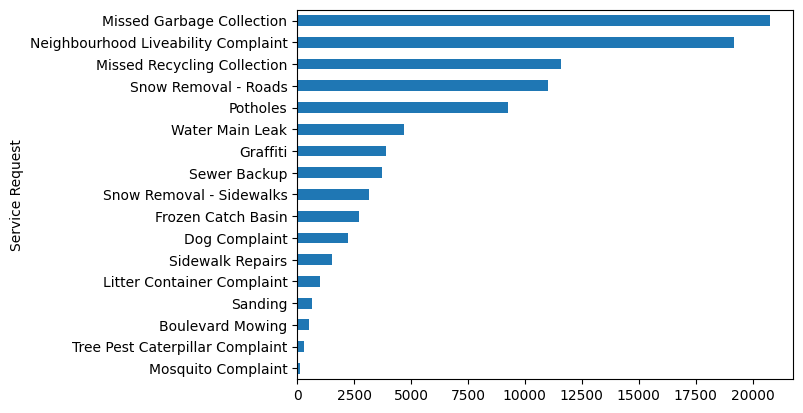

In [4]:
DF.groupby("Service Request").size().sort_values().plot(kind="barh")

### Overall distribution among neighbourhoods

<AxesSubplot: ylabel='Neighbourhood'>

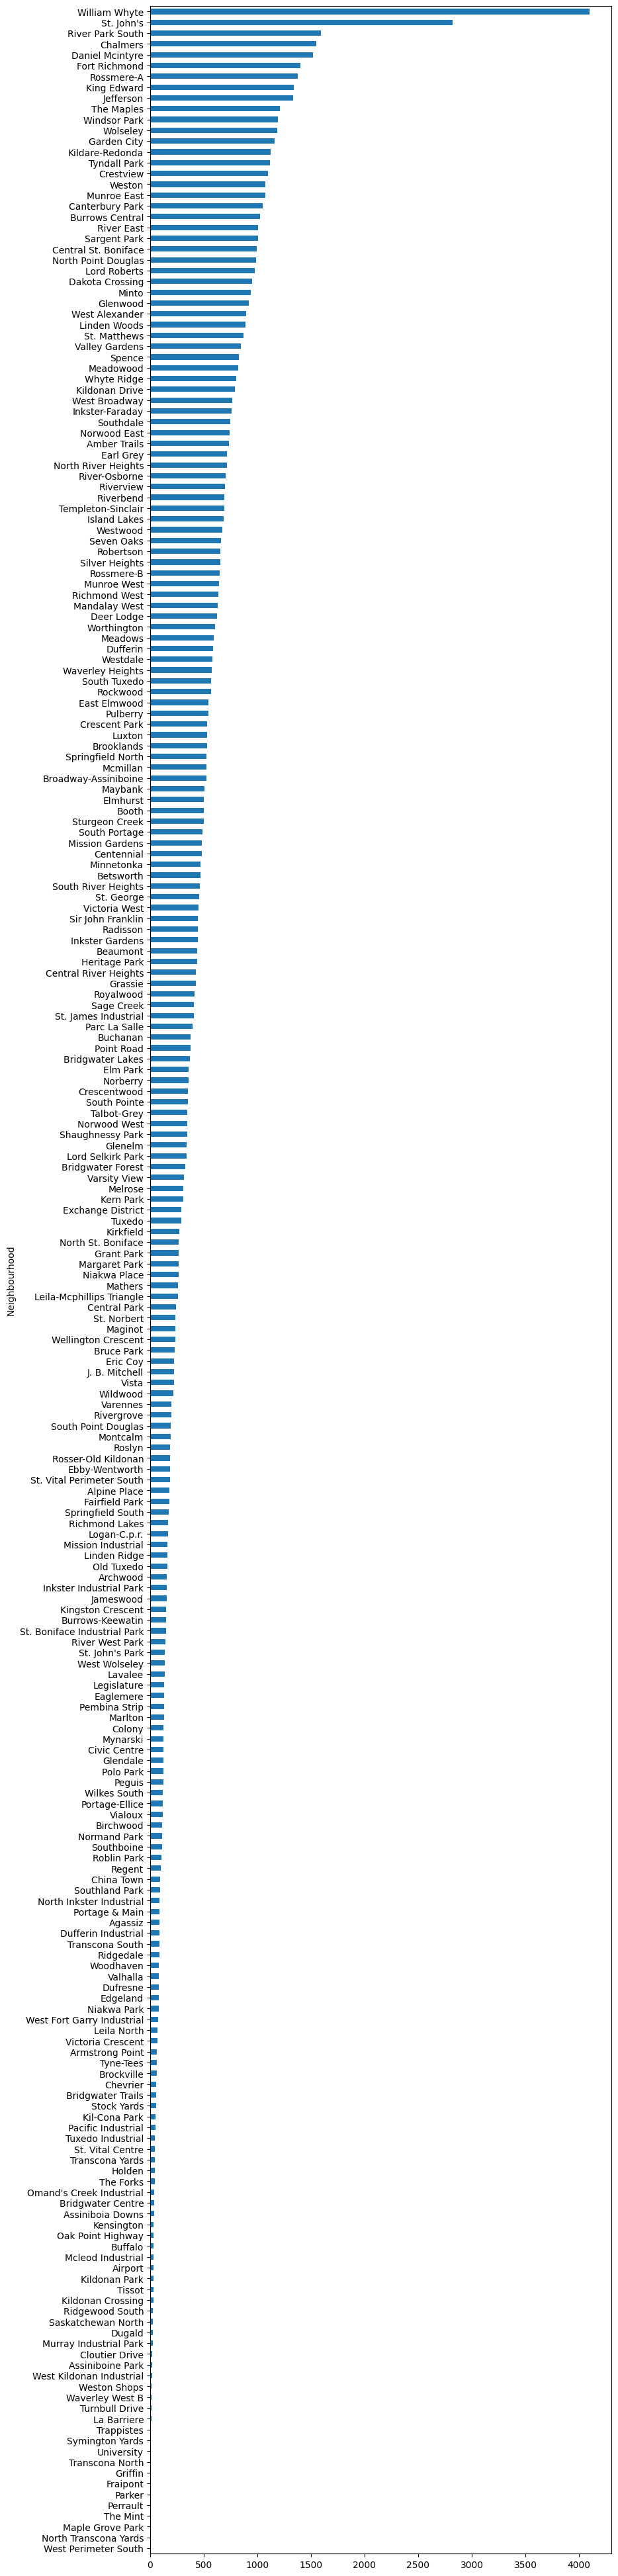

In [5]:
DF.groupby("Neighbourhood").size().sort_values().plot(kind="barh", figsize=(9, 50))

Maybe these downtown hoods are closer to ~~waste station~~? Nope, currently there's only one waste landfill in Winnipeg.  
How about trashtruck's depot?

## Overall Distribution among Requested services

<AxesSubplot: ylabel='Service Request'>

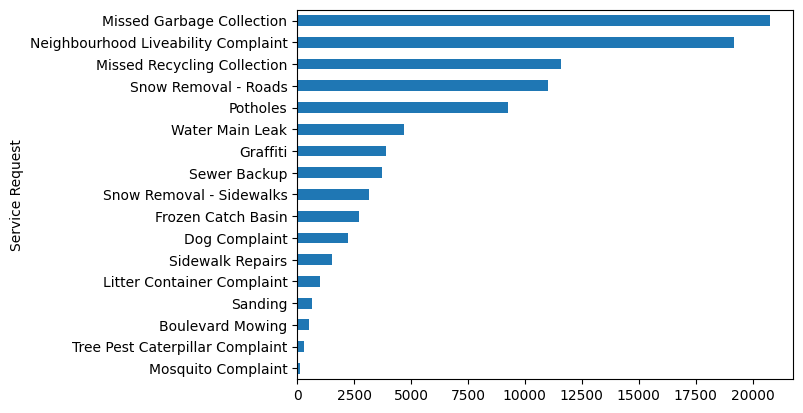

In [6]:
DF.groupby("Service Request").size().sort_values().plot(kind="barh")

## Playground

### Top 15 Neighborhoods's request

<AxesSubplot: ylabel='Service Request'>

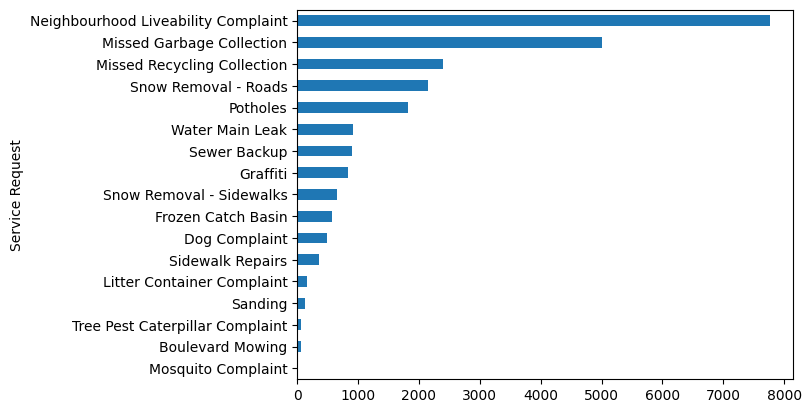

In [10]:
# Bar chart of Service Request for certain neibourhoods
def column_contains(column: str, neighbourhoods: list) -> str:
    ret = ""
    for neighbourhood in neighbourhoods:
        ret += f' or `{column}`.str.contains("{neighbourhood}", regex=False, na=False)'
    return ret[4:]

def top_n(n: int, group_by: str, ascending = False) -> list:
    return [key for key in DF.groupby(group_by).size().sort_values().nlargest(n).to_dict()] if not ascending else [key for key in DF.groupby(group_by).size().sort_values().nsmallest(n).to_dict()]

DF.query(column_contains("Neighbourhood", top_n(15, "Neighbourhood"))).groupby("Service Request").size().sort_values().plot(kind="barh")


### Overall requests by Month

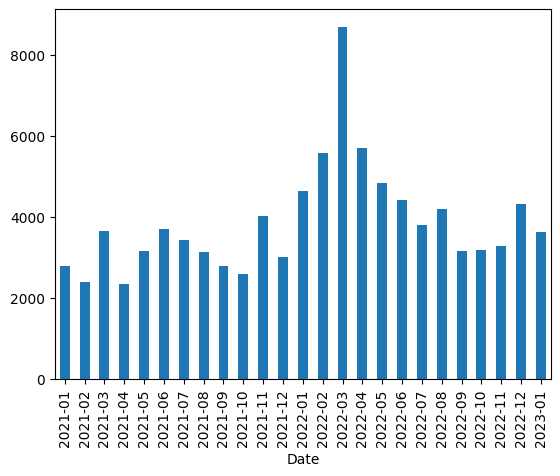

In [ ]:
DF.groupby(DF["Date"].dt.to_period("M")).size().plot(kind="bar")

### Missed Garbage Collection by month

In [25]:
def service_by_month(index: int):
    return DF.query(column_contains("Service Request", [services[index]])).groupby(DF["Date"].dt.to_period("M")).size().plot(kind="bar", title=services[index])

The data we have here doesn't have anything before the first day of 2021. How unfortunate. 

<AxesSubplot: title={'center': 'Boulevard Mowing'}, xlabel='Date'>

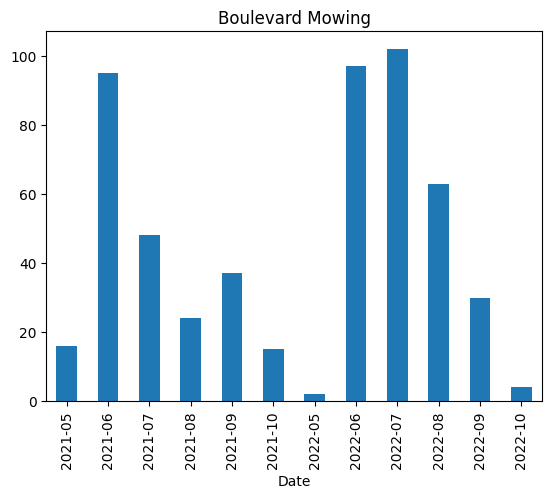

In [26]:
service_by_month(0)

<AxesSubplot: title={'center': 'Dog Complaint'}, xlabel='Date'>

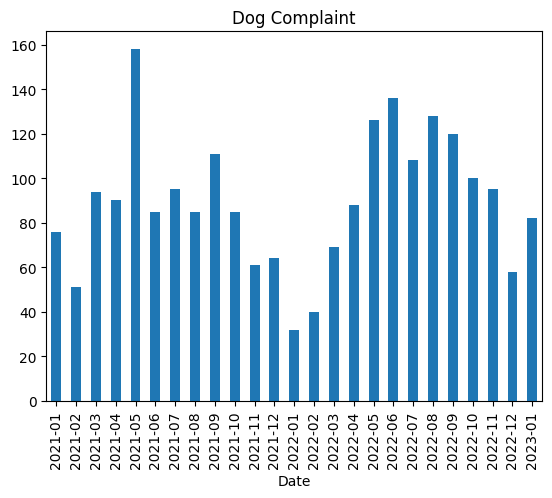

In [27]:
service_by_month(1)

<AxesSubplot: title={'center': 'Frozen Catch Basin'}, xlabel='Date'>

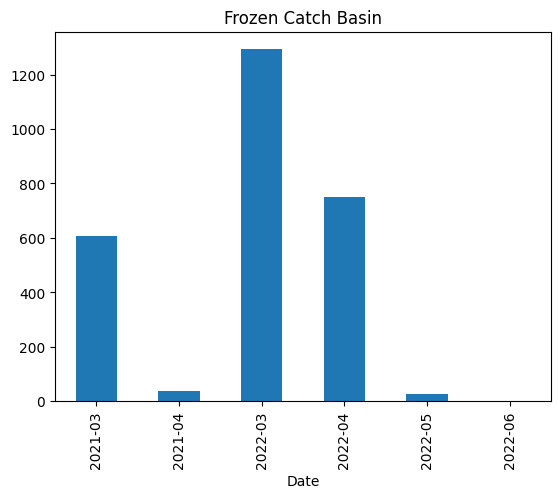

In [28]:
service_by_month(2)

<AxesSubplot: title={'center': 'Graffiti'}, xlabel='Date'>

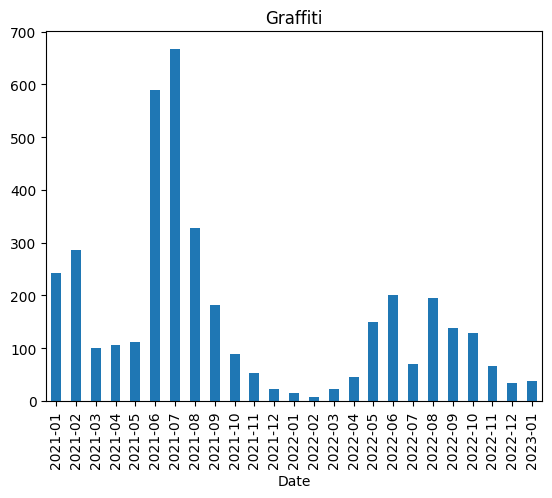

In [29]:
service_by_month(3)

<AxesSubplot: title={'center': 'Graffiti'}, xlabel='Date'>

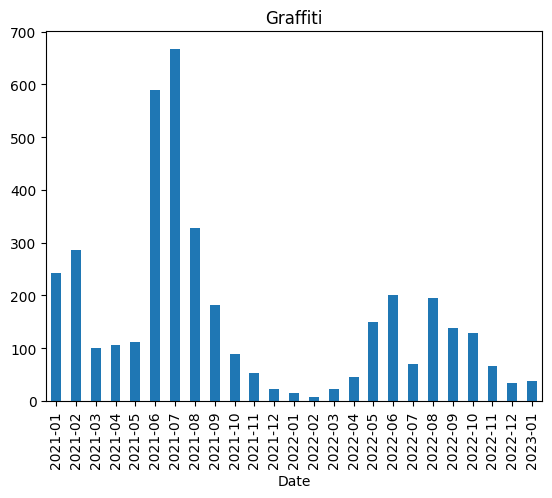

In [30]:
service_by_month(4)

<AxesSubplot: title={'center': 'Litter Container Complaint'}, xlabel='Date'>

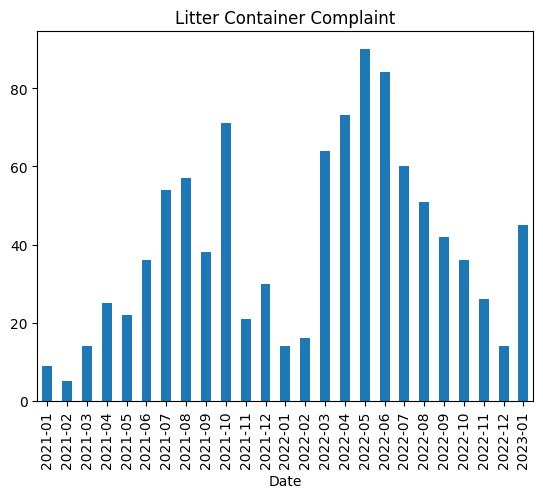

In [31]:
service_by_month(5)

<AxesSubplot: title={'center': 'Missed Garbage Collection'}, xlabel='Date'>

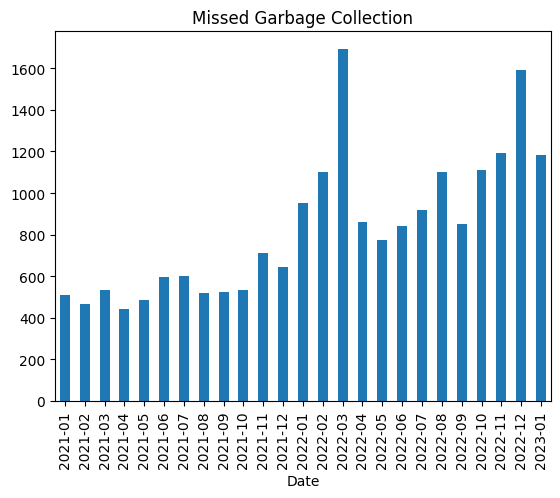

In [32]:
service_by_month(6)

<AxesSubplot: title={'center': 'Missed Recycling Collection'}, xlabel='Date'>

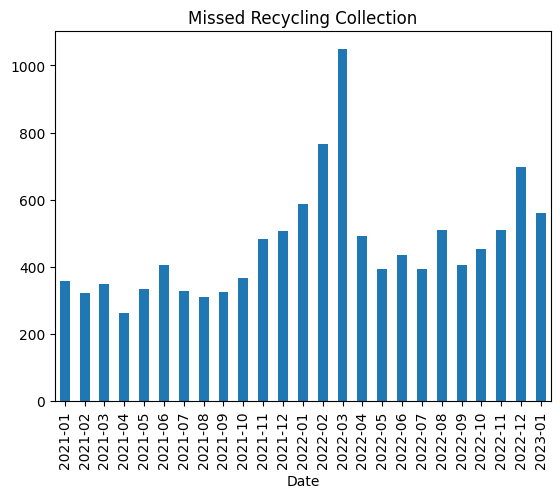

In [33]:
service_by_month(7)

<AxesSubplot: title={'center': 'Mosquito Complaint'}, xlabel='Date'>

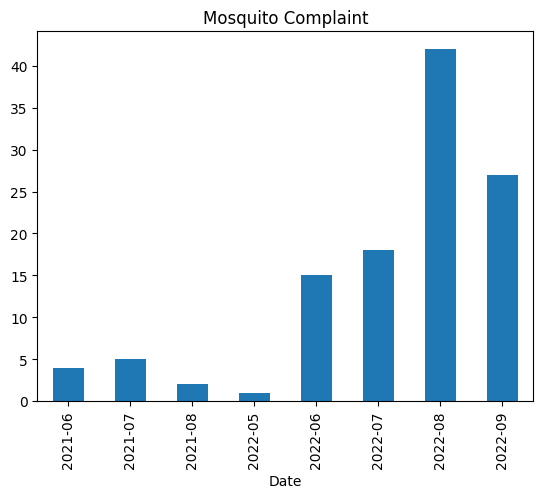

In [34]:
service_by_month(8)

<AxesSubplot: title={'center': 'Neighbourhood Liveability Complaint'}, xlabel='Date'>

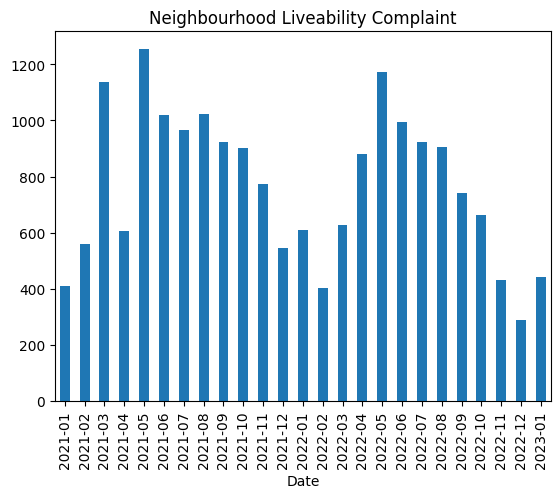

In [ ]:
service_by_month(9)

<AxesSubplot: title={'center': 'Potholes'}, xlabel='Date'>

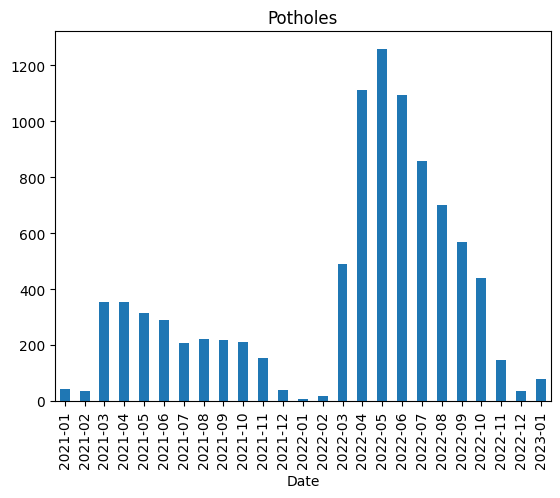

In [ ]:
service_by_month(10)

<AxesSubplot: title={'center': 'Sanding'}, xlabel='Date'>

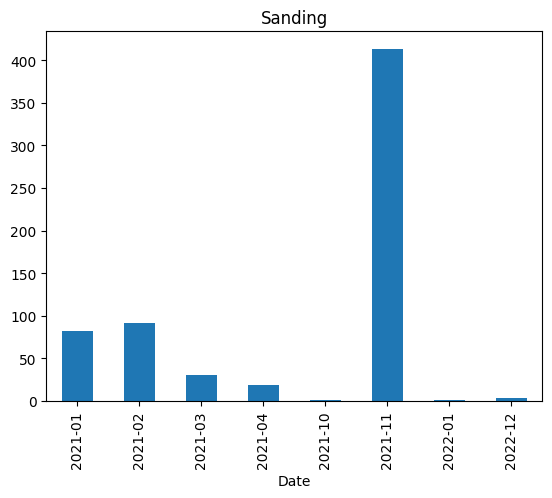

In [ ]:
service_by_month(11)

<AxesSubplot: title={'center': 'Sewer Backup'}, xlabel='Date'>

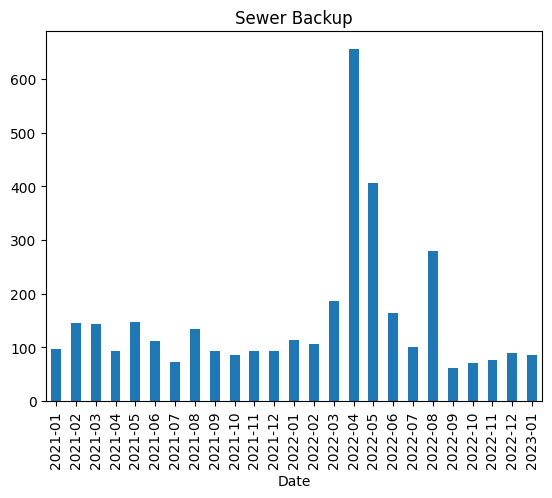

In [ ]:
service_by_month(12)

<AxesSubplot: title={'center': 'Sidewalk Repairs'}, xlabel='Date'>

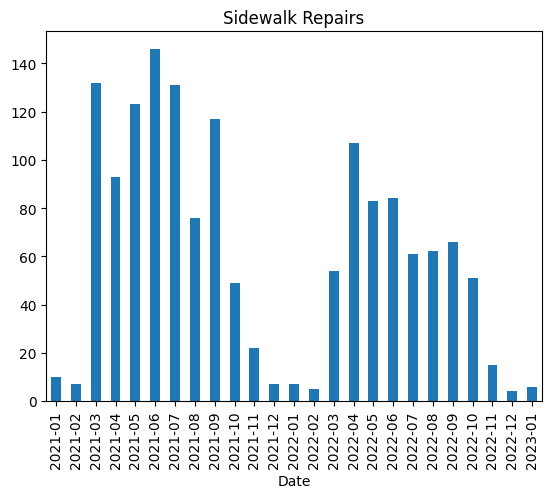

In [ ]:
service_by_month(13)

<AxesSubplot: title={'center': 'Snow Removal - Roads'}, xlabel='Date'>

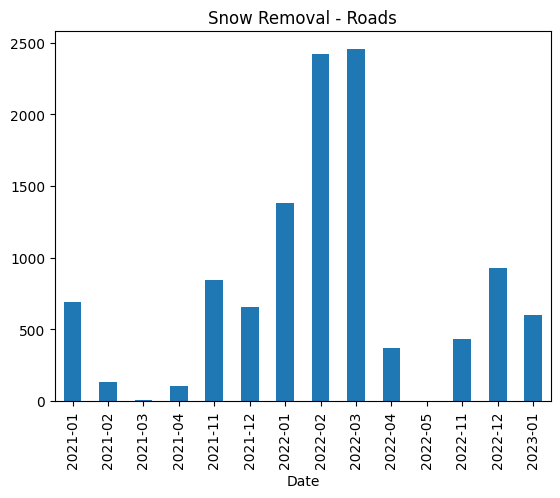

In [ ]:
service_by_month(14)

<AxesSubplot: title={'center': 'Snow Removal - Sidewalks'}, xlabel='Date'>

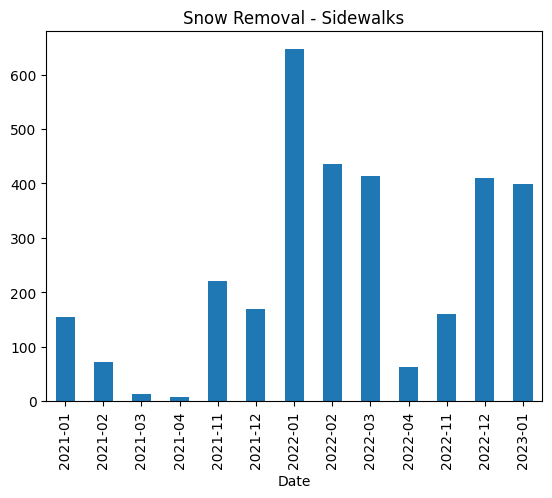

In [ ]:
service_by_month(15)

<AxesSubplot: title={'center': 'Tree Pest Caterpillar Complaint'}, xlabel='Date'>

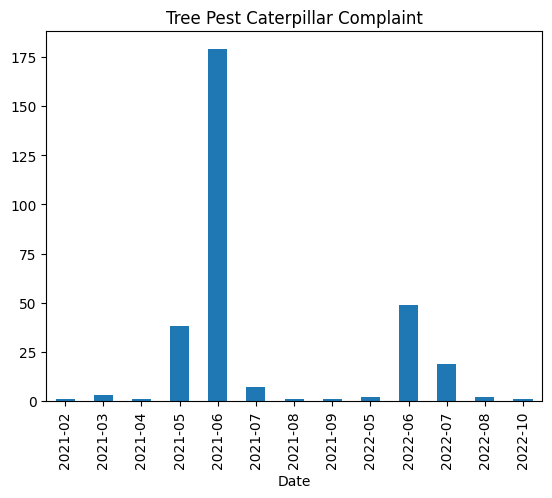

In [ ]:
service_by_month(16)

<AxesSubplot: title={'center': 'Water Main Leak'}, xlabel='Date'>

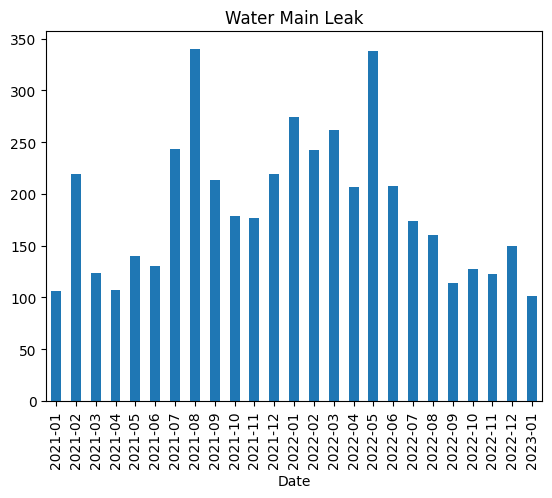

In [43]:
service_by_month(17)